# HC & DBSCAN

The following notebook is a guided exploration of the HC & DBSCAN algos on the same customer segementation dataset that we observed yesterday. If you haven't completed the KMeans notebook from yesterday, complete that before moving forward.

Your job is to fill in the missing code-blocks and analyze the outputs that your code produces.

Credit to [Nitesh Yadav](https://www.kaggle.com/niteshyadav3103) for the notebook.

Modifications to instructions and code are indicated via a note from me: (*Note*: ...)

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
# TODO: create 'df' dataframe using the 'Mall_Customers.csv' file

...

## HC

Let's start out with a hierarchical clustering algorithm. We first create a few dendrograms and analyze the cuts that we produce.

In [4]:
# TODO: select the "Age" & "Spending Score (1-100)" columns and save it into a new dataframe called "X1"

X1 = df.loc[:, ['...', '...']].values

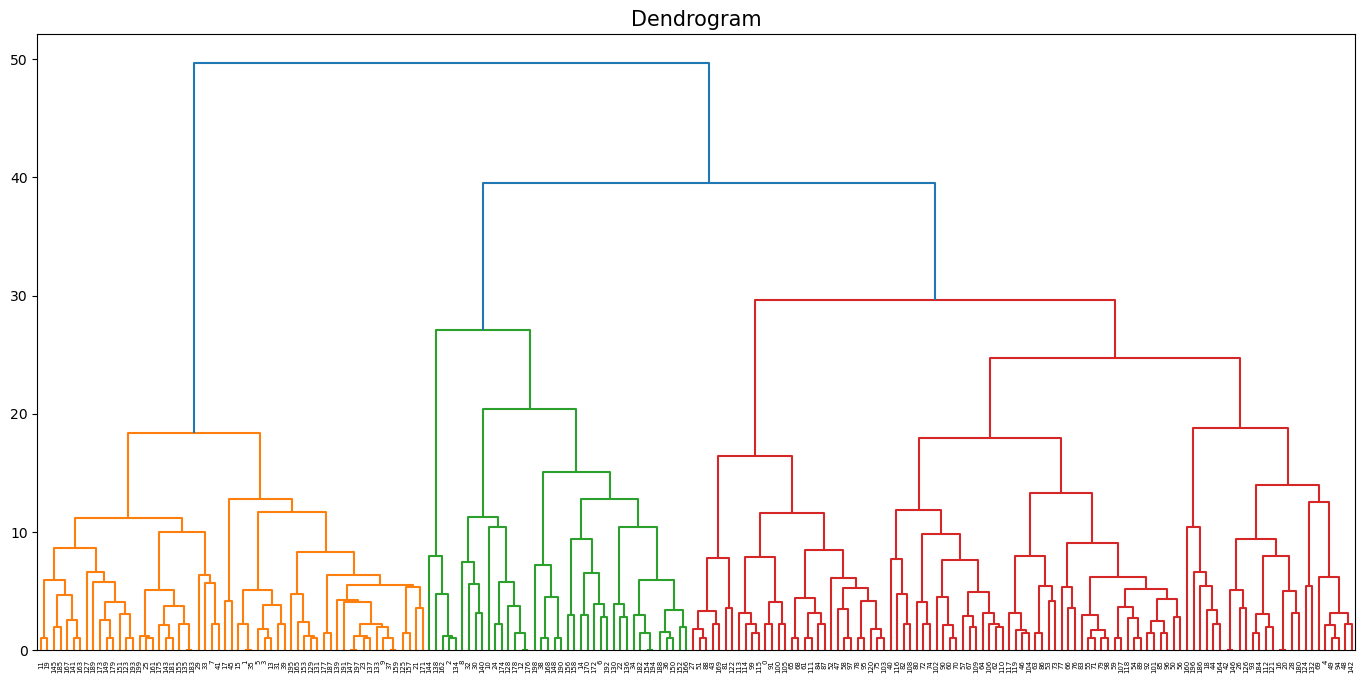

In [5]:
plt.figure(figsize = (17, 8))

# TODO: create dendogram using the "average" linkage method
# DOCUMENTATION: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
dendo = dendrogram(linkage(X1, method = '...'))
plt.title('Dendrogram', fontsize = 15)
plt.show()

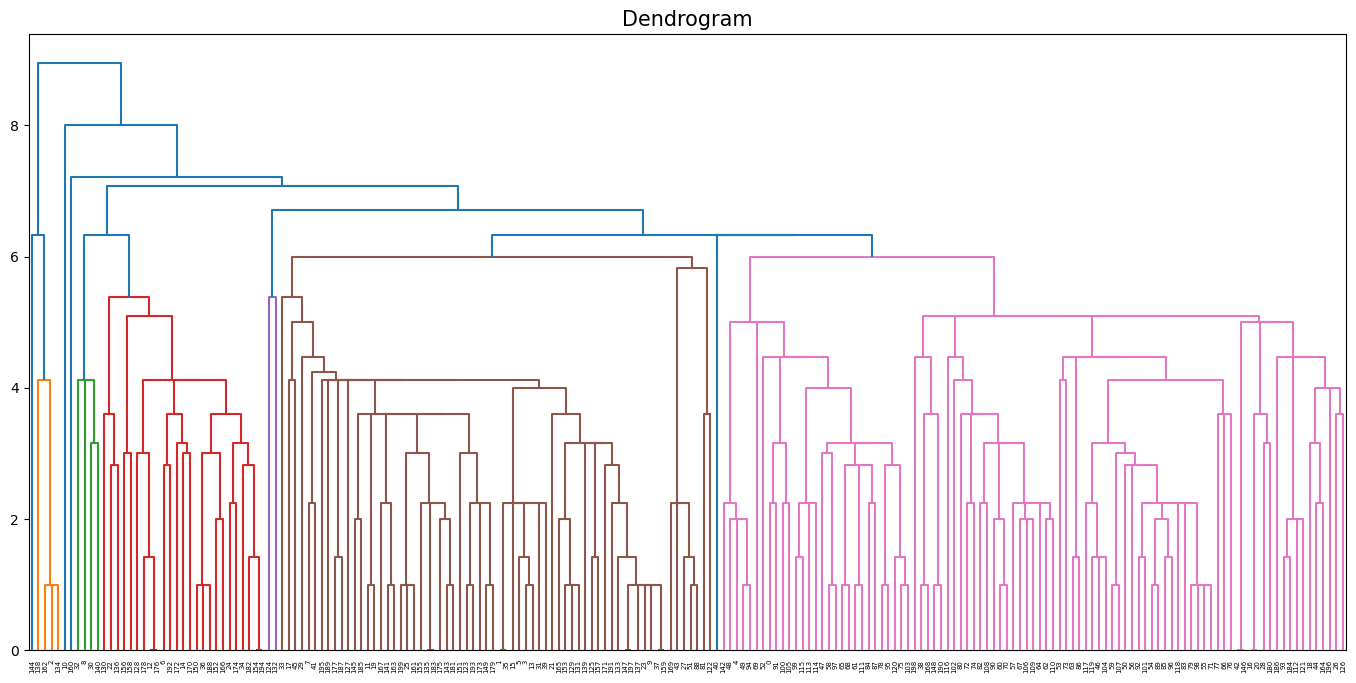

In [6]:
plt.figure(figsize = (17, 8))

# TODO: create dendogram using the "single" linkage method
# DOCUMENTATION: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
dendo = dendrogram(linkage(X1, method = '...'))
plt.title('Dendrogram', fontsize = 15)
plt.show()

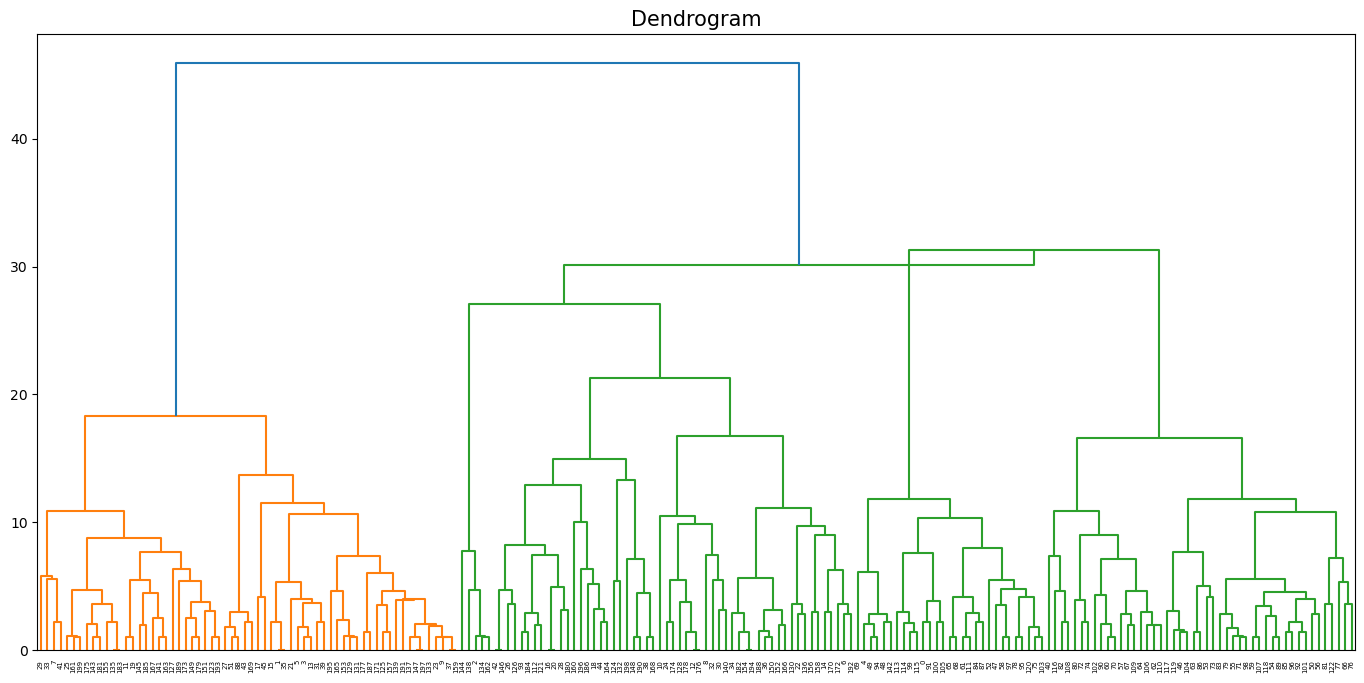

In [7]:
plt.figure(figsize = (17, 8))

# TODO: create dendogram using the "centroid" linkage method
# DOCUMENTATION: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
dendo = dendrogram(linkage(X1, method = '...'))
plt.title('Dendrogram', fontsize = 15)
plt.show()

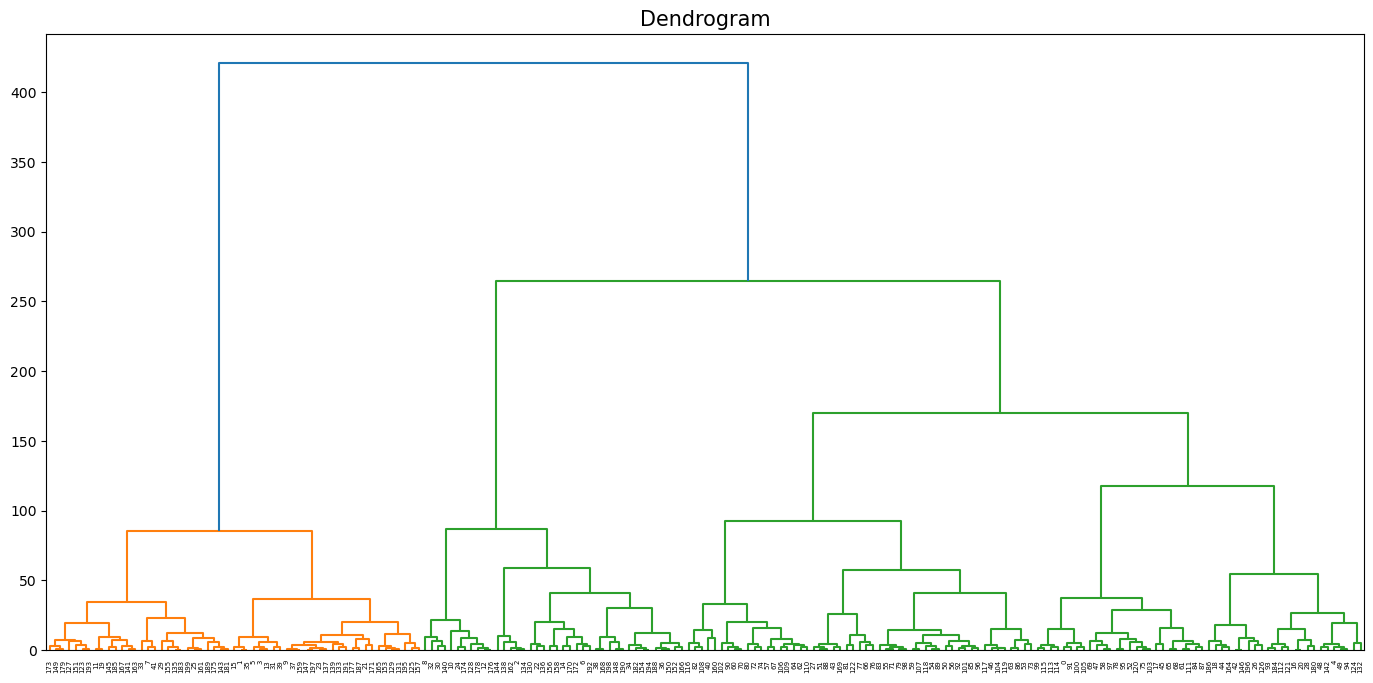

In [8]:
plt.figure(figsize = (17, 8))

# TODO: create dendogram using the "ward" linkage method
# DOCUMENTATION: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
dendo = dendrogram(linkage(X1, method = '...'))
plt.title('Dendrogram', fontsize = 15)
plt.show()

In [9]:
# TODO: based on these visualizations, which "linkage" method & number of clusters would you use?
# using your chosen metrics, fill in the `linkage` and `n_clusters` parameters
# DOCUMENTATION: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

agc = AgglomerativeClustering(n_clusters = ..., affinity = 'euclidean', linkage = '...')

# TODO: fit and predict your labels using your `X1` dataset

labels = agc.fit_predict(...)

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [15]:
labels

array([4, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 4, 3, 1, 3, 1,
       2, 1, 2, 1, 3, 0, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 3, 0,
       3, 4, 0, 4, 3, 3, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4,
       0, 0, 0, 4, 0, 3, 3, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 3, 4, 4, 4, 0, 0, 0, 0, 4, 3, 0, 1, 3, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1,
       2, 1], dtype=int64)

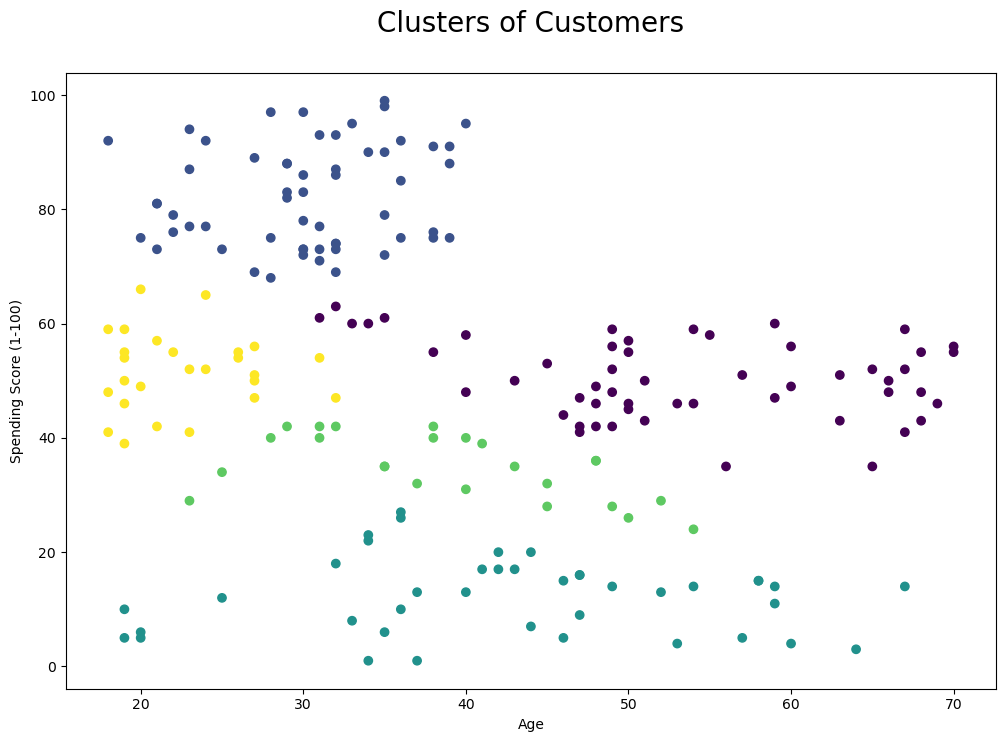

In [17]:
plt.figure(figsize = (12, 8))

plt.scatter(data=df, x="Age", y="Spending Score (1-100)", c = labels)

plt.title('Clusters of Customers\n ', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

## HC Self-reflection

Answer these 4 questions as a group. Write your answer in the respective markdown blocks below.

Which dendogram type appeared to make the "largest" clusters at the "earliest" height for this dataset?

write answer here

Which dendogram type appeared to make "inverted" fusions for this dataset?

write answer here

Which dendogram type(s) appears to have the most "imbalanced" clusters for this dataset?

write answer here

Which dendogram type(s) appears to have the most "balanced" clusters for this dataset? 

write answer here

## DBSCAN

Next, let's apply the DBSCAN algorithm on our dataset to see if we capture any "oddly" distributed clusters.

In [61]:
# create DBSCAN object

db = DBSCAN(eps=7, min_samples=3)

#TODO: Fit the `X1` dataset to your db object

db.fit(X1)

DBSCAN(eps=7, min_samples=3)

In [62]:
# create labels (note that "noise" is classified as -1)
labels = db.labels_ 
labels

array([ 0,  0,  1,  0,  0,  0,  2,  0,  2,  0, -1,  0,  2,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0,  0,  2,  0,  2,  0,
        2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2,  0,  0,  0,  1,  0,
        2,  0,  1,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0, -1,  0,  1,  0,  0,  0,  2,  0,  0,  0,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  0,  0,  2,  0,  0,  0,  0,
        0,  2,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0,  0], dtype=int64)

In [63]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
n_noise_ = list(labels).count(-1) 

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 2


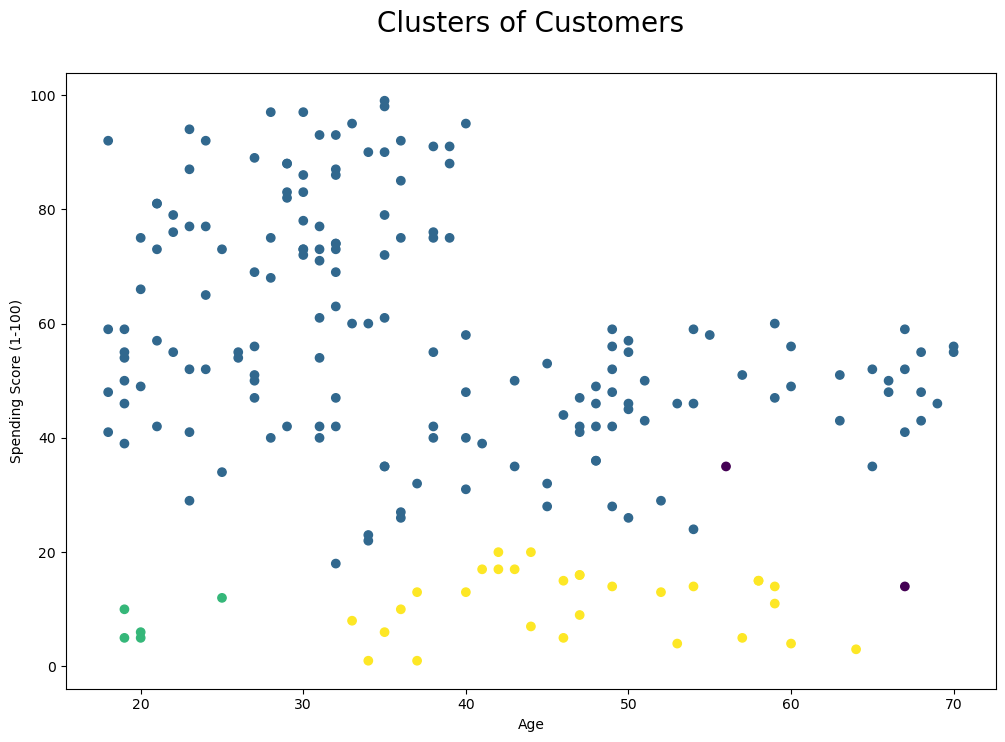

In [64]:
plt.figure(figsize = (12, 8))

plt.scatter(data=df, x="Age", y="Spending Score (1-100)", c = labels)

plt.title('Clusters of Customers\n ', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [56]:
# as we can see, when it comes to modeling dispered clusters, DBSCAN fails to find proficient classifications, we're better off modeling dense clusters

centers = [[1, 1], [-1, -1], [1, -1]]  
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, 
                            random_state=0)  # generate sample blobs

X = StandardScaler().fit_transform(X)

# DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

# we are calculating these for showcasing in diagram
# creating an array of true and false as the same size as db.labels
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  
core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True
labels = db.labels_  # similar to the model.fit() method, it gives the labels of the clustered data

# Number of clusters in labels, ignoring noise if present.

# the label -1 is considered as noise by the DBSCAN algorithm
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
n_noise_ = list(labels).count(-1)  # calculating the number of clusters

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

"""Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


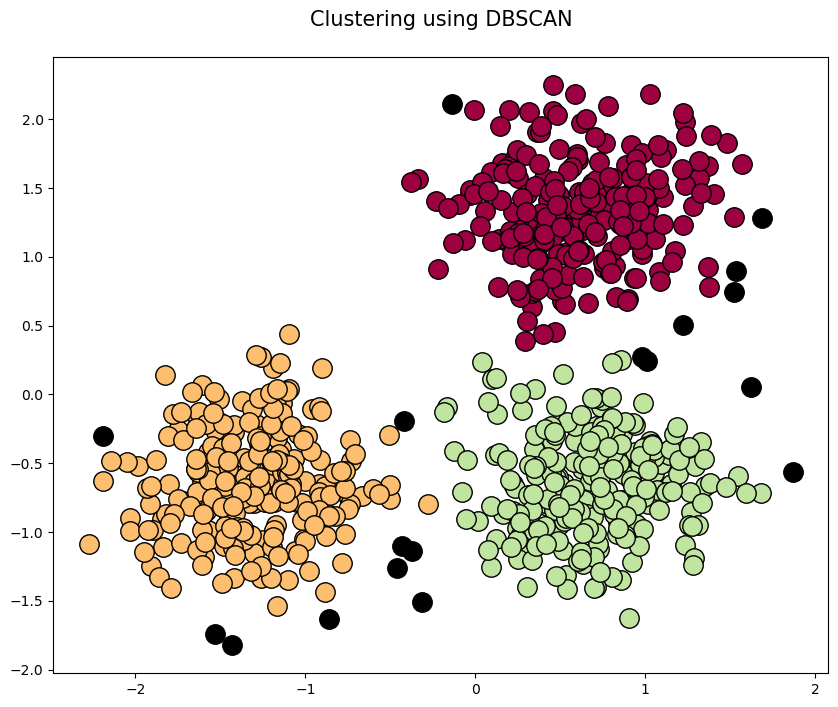

In [57]:
# Plot result
plt.figure(figsize = (10, 8))

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          # creating the list of colours, generating the colourmap
          for each in np.linspace(0, 1, len(unique_labels))]  

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)   # assigning class members for each class
    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class  
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points   
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    
plt.title('Clustering using DBSCAN\n', fontsize = 15)
plt.show()